In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [82]:
data = pd.read_csv("C://Users//WELCOME//Desktop//SCIO-images//NCH_BENE_IP_DDCTBL_AMT_PREDICTOR.csv")
data_no_nan = data.fillna(0)
data_no_nan = data_no_nan.fillna(0)

In [83]:
data_no_nan.head()

,CLM_ID,CLM_PMT_AMT,CLM_PASS_THRU_PER_DIEM_AMT,CLM_UTLZTN_DAY_CNT,CLM_YEAR_MONTH_CLM_FROM_DT_CAT,CLM_YEAR_MONTH_CLM_THRU_DT_CAT,NCH_BENE_DSCHRG_DT_YEAR_MONTH_CAT,ICD9_DGNS_CD_1_CAT,ICD9_PRCDR_CD_2_CAT,ICD9_DGNS_CD_3_CAT,CLM_ADMSN_DT_CAT,NCH_BENE_IP_DDCTBL_AMT
0,1.970000e+14,4000.0,0.0,1.0,28.0,26.0,26.0,2074.0,2074.0,2758.0,826.0,1100.0
1,1.960000e+14,26000.0,0.0,6.0,17.0,15.0,15.0,263.0,263.0,1509.0,492.0,1068.0
2,1.970000e+14,5000.0,0.0,2.0,21.0,20.0,20.0,1702.0,1702.0,1407.0,633.0,1068.0
3,1.960000e+14,5000.0,0.0,3.0,22.0,20.0,20.0,653.0,653.0,1768.0,650.0,1068.0
4,1.960000e+14,16000.0,0.0,5.0,31.0,30.0,30.0,873.0,873.0,783.0,932.0,1100.0


In [84]:
data_no_nan.isnull().sum()

CLM_ID                               0
CLM_PMT_AMT                          0
CLM_PASS_THRU_PER_DIEM_AMT           0
CLM_UTLZTN_DAY_CNT                   0
CLM_YEAR_MONTH_CLM_FROM_DT_CAT       0
CLM_YEAR_MONTH_CLM_THRU_DT_CAT       0
NCH_BENE_DSCHRG_DT_YEAR_MONTH_CAT    0
ICD9_DGNS_CD_1_CAT                   0
ICD9_PRCDR_CD_2_CAT                  0
ICD9_DGNS_CD_3_CAT                   0
CLM_ADMSN_DT_CAT                     0
NCH_BENE_IP_DDCTBL_AMT               0
dtype: int64

In [85]:
train1 = data_no_nan.drop(['NCH_BENE_IP_DDCTBL_AMT'],axis=1)

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
labels = data_no_nan['NCH_BENE_IP_DDCTBL_AMT']

In [88]:
from sklearn.cross_validation import train_test_split

In [89]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

In [90]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
reg.score(x_test,y_test)

0.93443428263056905

In [140]:
from sklearn import ensemble
params = {'n_estimators': 100, 'max_depth': 2, 'min_samples_split': 4,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

In [141]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=4,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [142]:
clf.score(x_test,y_test)

0.82843922745786591

In [143]:
y_pred = reg.predict(x_test)

In [144]:
y_pred

array([ 1041.20088335,  1065.76994519,  1078.59928637, ...,  1070.62606829,
        1029.4036199 ,  1063.32633487])

In [145]:
data_no_nan.head(1)

,CLM_ID,CLM_PMT_AMT,CLM_PASS_THRU_PER_DIEM_AMT,CLM_UTLZTN_DAY_CNT,CLM_YEAR_MONTH_CLM_FROM_DT_CAT,CLM_YEAR_MONTH_CLM_THRU_DT_CAT,NCH_BENE_DSCHRG_DT_YEAR_MONTH_CAT,ICD9_DGNS_CD_1_CAT,ICD9_PRCDR_CD_2_CAT,ICD9_DGNS_CD_3_CAT,CLM_ADMSN_DT_CAT,NCH_BENE_IP_DDCTBL_AMT
0,1.970000e+14,4000.0,0.0,1.0,28.0,26.0,26.0,2074.0,2074.0,2758.0,826.0,1100.0


In [146]:
new_pred = reg.predict(np.array([[1.970000e+14,260000,3,6,17,15,15,263,263,1509,492]]))

In [147]:
new_pred

array([ 1061.71889064])

In [148]:
t_sc = np.zeros((params['n_estimators']),dtype=np.float64)

In [149]:
y_pred = reg.predict(x_test)

In [150]:
for i,y_pred in enumerate(clf.staged_predict(x_test)):
    t_sc[i]=clf.loss_(y_test,y_pred)

In [151]:
testsc = np.arange((params['n_estimators']))+1

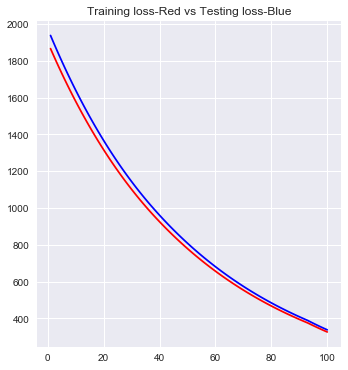

In [152]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc,clf.train_score_,'b-',label= 'Set dev train')
plt.title("Training loss-Red vs Testing loss-Blue")
plt.plot(testsc,t_sc,'r-',label = 'set dev test')
plt.show()

In [153]:
new_pred[0]

1061.7188906423241

In [154]:
y_pred

array([ 1037.82249942,  1065.13608542,  1065.13608542, ...,  1065.13608542,
        1037.82249942,  1065.13608542])

In [156]:
from sklearn.externals import joblib
clf = joblib.load('SCIO-NCH_BENE_IP_DDCTBL_AMT_PREDICTOR.pkl')

In [158]:
prediction = clf.predict(np.array([[1.970000e+14,260000,3,6,17,15,15,263,263,1509,492]]))

In [162]:
round(prediction[0])

1068.0

In [164]:
prediction = clf.predict(np.array([[1.970000e+14,260000,3,6,17,15,15,263,263,1509,492]]))

In [165]:
round(prediction[0])

1068.0